<a href="https://colab.research.google.com/github/Yash1289/play_store_data_Eda/blob/Test/Play_Store_App_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> We wil explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Any data scientist be it senior or junior spends almost 80% of its time on EDA , a process which includes cleaning and sorting the data and checking its feature correlation to weed out the noise and gain some insight as to what pieces are most useful

 **'The goal is to turn data into information and information into insight'**

This was said by Carly Fiorina , former CEO of Hewlett-Packard and with this same single view in mind we will also try to generate some useful information and insight from the database that we are going to work on over the course of this project 

At first we will go through our play store database and look for the factors that play a role in the engagement and success of an app and then we will go through our second database that is User reviews and look for any specific pattern in reviews wrote by the users while using various different apps





For this project we are going to use 

1.   Numpy :- For its linear algebra functions and the advantage it offers over list in terms of speed and memory consumed
2.   Pandas :- This will be our primary data analysis library necessary for almost all of our data manipulations jobs
3.   Matplotlib :- Basic visualization library that we need for plotting and graphs
4.   Seaborn :- For more customizable and advanced data visualization





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
from google.colab import files

In [ ]:
#Mounting our google drive so we can acess the files in it through our google collab noteboook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the csv file from our database

file_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/Play Store Data.csv"
play_store_df = pd.read_csv(file_path)

### Now we will perform some basic data exploration such as


*   Checking the head of the database to gain some general idea about the nature of the database 
*   Finding  out its shape to know how many observations and variables are in our dataset
*   We are also using info( ) to check the information about data and datatypes of each respective variable

All of this will help us to know our database better 

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_df.shape #As We can see we have in total 10841 observations and 13 variables

(10841, 13)

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Checking out the list of variables we have in our dataset

play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Basic Data Cleaning to handle out the arbitary, duplicates as well as null and na values 

In [ ]:
#Dropping out the duplicate observations having the same app name

play_store_df.drop_duplicates(subset ="App" , keep="first",inplace=True ,ignore_index=True)

In [ ]:
play_store_df.shape #After dropping all the duplicates we have 9660 rows and 13 Columns

(9660, 13)

In [ ]:
#Filtering out the observations having app rating more than 5 

arbitary_ratings = play_store_df[play_store_df["Rating"] > 5]
arbitary_ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As We can see above we have one app whose rating is more than 5 , and if we observe the data in this row more closely we can notice that the data of all the columns except "App" is shifted left by one place by one place in the row

In [ ]:
#Getting the index of the row with max rating 
index = play_store_df["Rating"].argmax() 
#Shifting the columns in the row except "App" by one place to the right
play_store_df.iloc[index , 1: ] = play_store_df.iloc[index , 1: ].shift()  

In [ ]:
#Changing the data type of Rating and Review column from String to float

play_store_df.loc[index , "Rating"] = float(play_store_df.loc[index ,"Rating"])
play_store_df.loc[index ,"Reviews"] = int(play_store_df.loc[index ,"Reviews"])


In [ ]:
#Changing Last Updated to datetime object for better data analysis

play_store_df["Last Updated"] = pd.to_datetime(play_store_df['Last Updated'])

In [ ]:
play_store_df[play_store_df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up


In [ ]:
#Checking out the number of null values we have across different variables

play_store_df.isnull().sum()

App                  0
Category             1
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

As we can see above ,most of the null values in our dataset is from Rating column which has in total 1463 null values

To handle all these missing values we can take two kinds of approach
1. Replace all missing values with the mean values 
2. Replace all the missing values with the median values 

If our dataset have extreme outliers we will use the 2nd method and if not then we will move forward with the first approach.





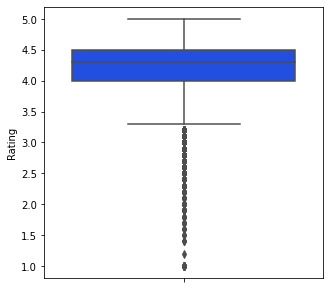

In [ ]:
plt.rcParams['figure.figsize'] = 5,5
sns.boxplot( y = "Rating" , data=play_store_df , palette="bright")

As we can see above we have huge numbers of outliers in our database i.e we have great number of apps whose rating is beyond the lower and upper extremes of first and third quartile respectively so we will replace na values with median instead of mean

In [ ]:
#Replacing na values of Rating with median values
play_store_df["Rating"] = np.where(play_store_df["Rating"].isna(), play_store_df["Rating"].median() , play_store_df["Rating"]  )

In [ ]:
#Now Price, Rating and review column's data type should be changed, for better analysis

play_store_df["Rating"] = play_store_df["Rating"].astype(float)
play_store_df["Reviews"] = play_store_df["Reviews"].astype(int)
play_store_df['Price'] = play_store_df.Price.str.replace('$','')
play_store_df['Price'] = play_store_df.Price.astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   object        
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 981.2+ KB


In [ ]:
#Checking out the unique values of installs we have in out dataframe

play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
def stringToInt(installs):
  ''' Function to Convert string values of installs to its numeric value'''
  if installs == "0":
    return int(installs)
  else :
    return int(installs[:-1].replace(",",""))

In [ ]:
#Changing the data type of Installs column from string to int 

play_store_df["Installs"] = play_store_df["Installs"].apply(stringToInt)

In [ ]:
play_store_df.to_csv("Clear_play_store_data.csv")

In [ ]:
!cp Clear_play_store_data.csv "drive/My Drive/"

### Now as we are done with cleaning our data we will now move forward with our quest of finding the key factors which makes an app popular on google play store . As app success and engagement is our main priority so at times we will limit our data analysis only up until apps which have more than or equal to 1 million downloads

In [ ]:
#Filtering out apps having more than 1m download
apps_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]

In [ ]:
apps_with_1m_downloads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 2 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             3395 non-null   object        
 1   Category        3395 non-null   object        
 2   Rating          3395 non-null   float64       
 3   Reviews         3395 non-null   int64         
 4   Size            3395 non-null   object        
 5   Installs        3395 non-null   int64         
 6   Type            3395 non-null   object        
 7   Price           3395 non-null   float64       
 8   Content Rating  3395 non-null   object        
 9   Genres          3395 non-null   object        
 10  Last Updated    3395 non-null   datetime64[ns]
 11  Current Ver     3394 non-null   object        
 12  Android Ver     3395 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 371.3+ KB


In [ ]:
#Finding the highest rated apps across our google play store data that have more than 1m downloads
highest_rated_apps = apps_with_1m_downloads[apps_with_1m_downloads["Rating"] == apps_with_1m_downloads["Rating"].max()]
highest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-15,8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0.0,Everyone,Beauty,2017-11-09,2.3.0,4.1 and up
585,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0.0,Everyone,Education;Education,2018-07-20,2.16.11.10,4.2 and up
1029,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0.0,Everyone,Health & Fitness,2018-06-21,1.0.4,4.2 and up
1031,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0.0,Everyone,Health & Fitness,2018-06-21,1.0.2,4.2 and up
1078,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0.0,Everyone,Health & Fitness,2018-07-30,Varies with device,Varies with device
5963,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14M,1000000,Free,0.0,Everyone,Entertainment,2018-06-04,3.3,4.0.3 and up
8490,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0.0,Everyone,Books & Reference,2018-06-15,Varies with device,Varies with device


One common pattern that is visible among is all these apps with the highest rating is that they all have a content rating of "Everyone" 

In [ ]:
#Finding out the lowest Rated app having more than 1 million downloads
lowest_rated_apps = apps_with_1m_downloads[apps_with_1m_downloads["Rating"] == apps_with_1m_downloads["Rating"].min()]
lowest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4099,AppFinder by AppTap,TOOLS,2.0,2221,4.9M,5000000,Free,0.0,Everyone,Tools,2017-10-03,1.8.2.7,5.0 and up


We all know that the bar on which any app's success is measured is its Rating, number of Installations and number of Reviews . So if we try to sort our dataset on basis on number of Installs and Reviews , then that will give us a very good idea about which apps are most Popular (if not most well received)  on play store

In [ ]:
#Trying to find the top 10 apps which are most installed and have the most number of reviews 
highest_installed_apps = apps_with_1m_downloads.sort_values(by =["Installs", "Reviews"] , ascending=[False, False] , ignore_index = True)[:10]
highest_installed_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
4,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
5,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
6,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
7,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
8,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
9,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device


In [ ]:
#Finding the most popular app across playstore based on number of reviews 
most_popular_app = play_store_df[play_store_df["Reviews"] == play_store_df["Reviews"].max()]
most_popular_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2002,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


**Facebook is the most popular app on playstore with the highest number of installs and reviews**

---



### After looking at the list of Best Rated and Most popular Apps it's time to look into what kind of apps are most well received i.e which category/genre of apps are more successful than other 

In [ ]:
#checking out the number of category we have in total in our dataset
play_store_df["Category"].nunique()

33

Text(0.5, 1.0, 'Apps with more than 1 million downloads across different Categories')

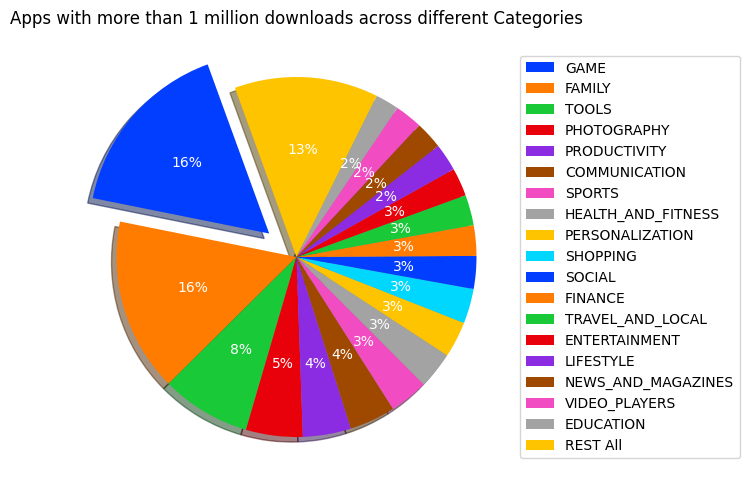

In [ ]:
#Finding out the number of apps that we have in each category bracket
category_wise_apps = apps_with_1m_downloads["Category"].value_counts()

#Making a list of all Categories
category_wise_apps_list = category_wise_apps.index.tolist()
#Making a list of count of apps that each category has 
category_wise_apps_count = list(category_wise_apps.values)

''' Plotting a pie chart to show the percentage of apps from each category that 
    we have in our apps with more than 1 million dataset, we will show individual
    pie pieces for top 18 categories and bundle out the rest into "Rest All" piece'''

slicingIndex = 18

category_wise_apps_list = category_wise_apps_list[:slicingIndex]
category_wise_apps_count_new = category_wise_apps_count[:slicingIndex]
sumofRest = sum(category_wise_apps_count[slicingIndex:])
category_wise_apps_list.append("REST All")
category_wise_apps_count_new.append(sumofRest)

totalCategories = len(category_wise_apps_count_new)

fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(category_wise_apps_count_new, explode=explode, labels = category_wise_apps_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, category_wise_apps_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Apps with more than 1 million downloads across different Categories")


The Above pie chart is indicating that Game and Family are the two major categories having the most number of apps with more than 1 Million Downloads . 

In [ ]:
# Number of apps count in each category across dataset
apps_count_across_all_category = play_store_df["Category"].value_counts()
#Number of apps count in each category across our filtered dataset of apps with more than 1m downloads
popular_apps_count_across_all_category = apps_with_1m_downloads["Category"].value_counts()

#Finding out the percentage of apps in 1m dataset from each category in reference to the total number of apps that each category have in the whole dataset
category_list = category_wise_apps.index.tolist()
apps_count_across_all_category = apps_count_across_all_category.values
popular_apps_count_across_all_category = popular_apps_count_across_all_category.values
percentage_of_apps_1m = (popular_apps_count_across_all_category/apps_count_across_all_category)*100
category_percentage_df = pd.DataFrame({'Category' : category_list ,"Percentage of apps in 1m" : list(percentage_of_apps_1m) } , columns = ["Category" , "Percentage of apps in 1m"])
category_percentage_df.sort_values(by="Percentage of apps in 1m" , ignore_index=True , ascending=False)[:5]

,Category,Percentage of apps in 1m
0,FAMILY,55.161627
1,PHOTOGRAPHY,41.190476
2,FOOD_AND_DRINK,41.176471
3,BOOKS_AND_REFERENCE,40.458015
4,BUSINESS,40.350877


The above dataframe shows that of the total number of apps that are of FAMILY category in our dataframe more than 50% of them have more than 1m downloads , so we can say that apps which are made for families have a higher success rate in terms of Installs

Text(0.5, 1.0, 'Avg Installs across top 10 Categories ')

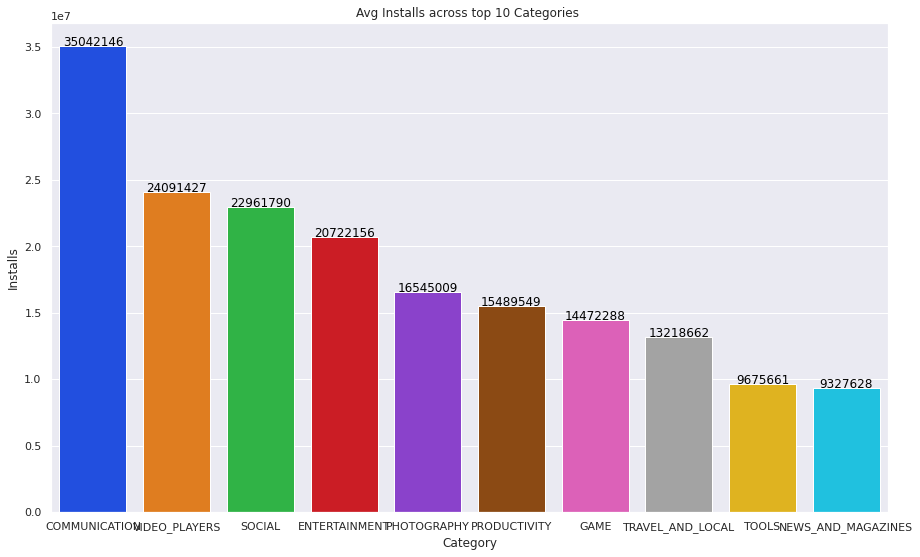

In [ ]:
#Grouping by category and finding the mean of installs across whole dataset 
installs_groupby = play_store_df.groupby("Category").agg({ "Installs" : "mean"}).reset_index().sort_values(by = "Installs" , ascending=False ,ignore_index=True)[:10]
installs_groupby["Installs"] = installs_groupby["Installs"].astype("int64")
installs_groupby

#Barplot showing average installs acorss different CAtegories
plt.rcParams['figure.figsize'] = 15,9
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Category',y='Installs',data = installs_groupby, palette = 'bright',estimator = np.mean)
for index, row in installs_groupby.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")
plt.title("Avg Installs across top 10 Categories ")

Athough apps from communication category are less in number(as we saw in the pie chart)but they do have really huge value of average installs , further verifying the pattern that we saw while finding out the list of most popular apps in which we had almost 5 apps in top 10 from communication category . This says that if communication apps are well made they can be really popular

In [ ]:
#Grouping by Category and performing mean on Rating to find the mean rating of each category
ratings_groupby = play_store_df.groupby("Category").agg({"Rating" : "mean"}).reset_index().sort_values(by="Rating" , ignore_index="True" , ascending=False)
ratings_groupby[:5]


,Category,Rating
0,EVENTS,4.395313
1,EDUCATION,4.363866
2,ART_AND_DESIGN,4.354687
3,BOOKS_AND_REFERENCE,4.334234
4,PERSONALIZATION,4.325532


In [ ]:
#Grouping by category and performing max on number of Reviews to find the most popular app from each category
highest_across_category = play_store_df.groupby(["Category"]).agg({ "Reviews" : "max" , "App" : "first"}).reset_index().sort_values(by="Reviews" , ignore_index="True" , ascending=False)
highest_across_category[:5]

,Category,Reviews,App
0,SOCIAL,78158306,Facebook
1,COMMUNICATION,69119316,Messenger – Text and Video Chat for Free
2,GAME,44891723,ROBLOX
3,TOOLS,42916526,Moto File Manager
4,VIDEO_PLAYERS,25655305,YouTube


In [ ]:
#Now Searching the most installed (which is above 1 billions downloads) apps

max_installs= play_store_df[play_store_df.Installs==play_store_df.Installs.max()]

In [ ]:
max_installs.Category.unique()

array(['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'GAME',
       'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PRODUCTIVITY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES'],
      dtype=object)

**Okay!!!!**
*These categories are the popular among users*

In [ ]:
#finding the average rating of most popular categories

max_installs_good_rating= max_installs.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

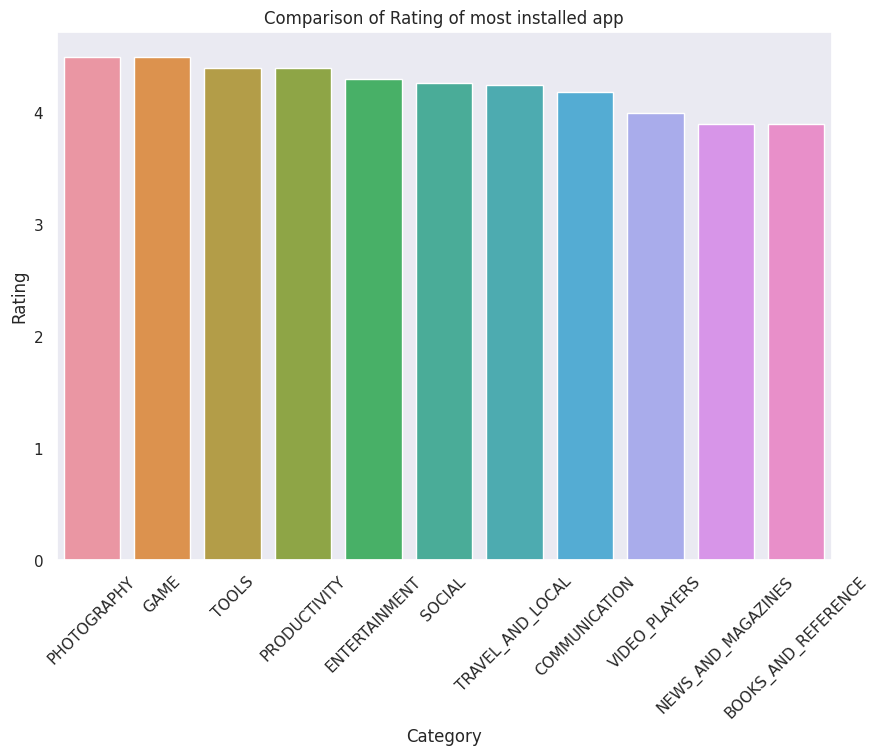

In [ ]:
fig_1 = plt.figure(figsize=(10,7),dpi=100)
sns.set(font_scale = 1)
plt.grid()
ax = sns.barplot(x="Category", y="Rating", data=max_installs_good_rating,ci=0)
plt.title('Comparison of Rating of most installed app')
plt.ylabel('Rating')
plt.xlabel('Category')
plt.xticks(rotation=45)

### Another factor that can decide the popularity of a certain app is the Content Rating that it carries and so it must be studied in detail that to what extent it affects an app's success

Text(0.5, 1.0, 'Percentage of Apps from each content rating')

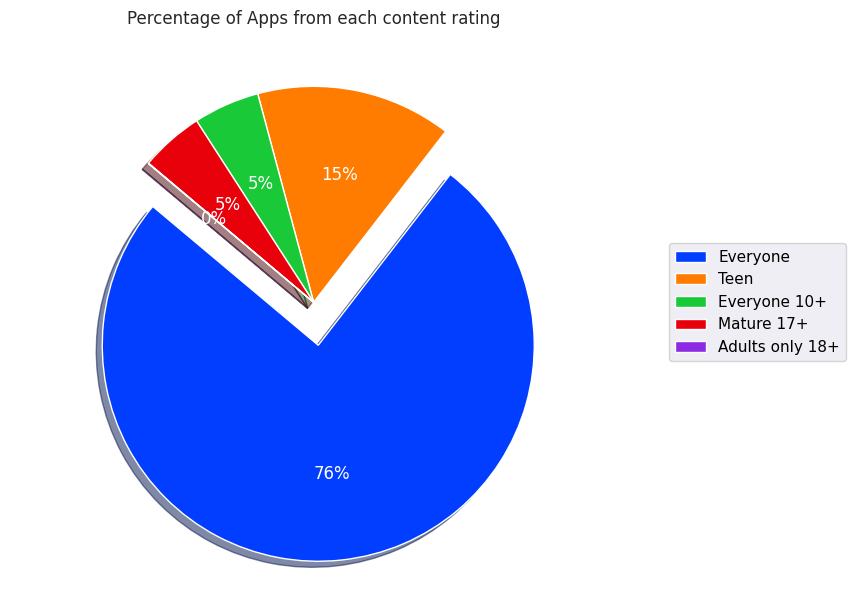

In [ ]:
#Finding out the number of apps that we have in each category bracket
content_rating_count = apps_with_1m_downloads["Content Rating"].value_counts()

#Making a list of all Categories
content_rating_list = content_rating_count.index.tolist()
#Making a list of count of apps that each category has 
content_rating_apps_count = content_rating_count.values

totalCategories = len(content_rating_list)

'''Plotting a pie chart to show the percentage of apps from each Content
   Rating with more than 1 million downloads'''

fig_1 = plt.figure(figsize=(8,6),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(content_rating_apps_count, explode=explode, labels = content_rating_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=140, 
                                    textprops=dict(color="w"))

plt.legend(wedges, content_rating_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Percentage of Apps from each content rating")

The pie chart makes it clear that majority of popular apps have a content Rating of everyone which means they are suitable for all age groups

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

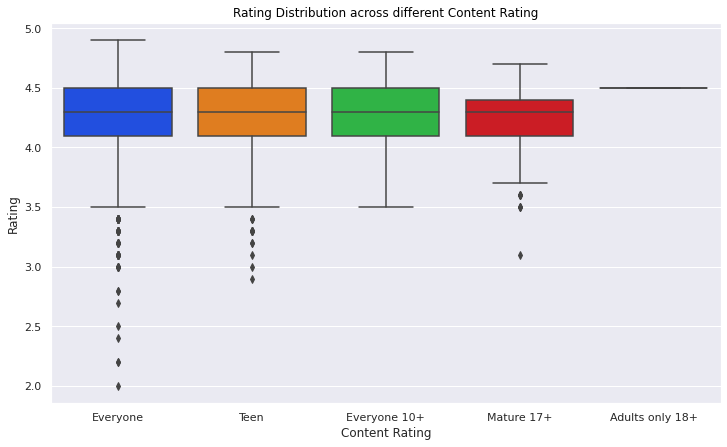

In [ ]:
#Plotting a boxplot using seaborn to show the pattern in rating across different Content Rating

plt.rcParams['figure.figsize'] = 12,7
ax = sns.boxplot(x="Content Rating" , y = "Rating" , data=apps_with_1m_downloads , palette="bright")
plt.title("Rating Distribution across different Content Rating")


In the boxplot we can notice that apps marked for Everyone have relatively higher extreme values and the ones which are only for Mature 17+ consumers have a slightly lower value for third quartile which means they are not as highly rated as the other Content Rating brackets

Text(0.5, 1.0, 'Avg Installs across different Content Rating')

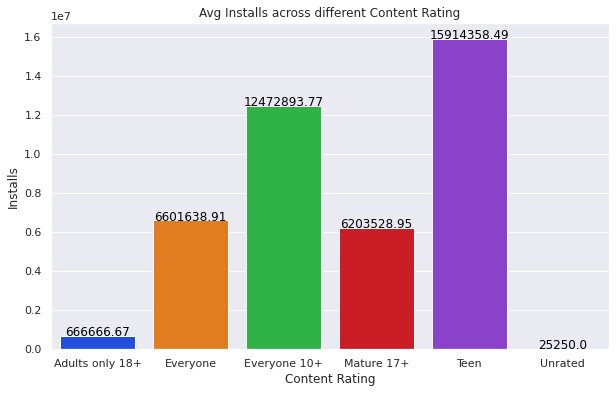

In [ ]:
#Grouping by Content Rating and performing mean on Installs to find the avg no. of installs across different Content Rating
content_installs_mean = play_store_df.groupby("Content Rating").agg({ "Installs" : "mean"}).reset_index()
content_installs_mean

#Plotting a bar chart to show the trend in avg installs across different Content Rating
plt.rcParams['figure.figsize'] = 10,6
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Content Rating',y='Installs',palette = 'bright',data = content_installs_mean ,estimator = np.mean)
for index, row in content_installs_mean.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")
plt.title("Avg Installs across different Content Rating")

The above bar chart is clearly indicating that apps made for teens are really popular and have much higher installation rates as compared to all other Content Rating

In [ ]:
##Grouping by category and performing max on number of Reviews to find the most popular app from each content Rating bracket
highest_installed_across_content = play_store_df.groupby("Content Rating").agg({ "Reviews" : "max" , "App" : "first"})
highest_installed_across_content

,Reviews,App
Content Rating,,
Adults only 18+,50017,Manga Master - Best manga & comic reader
Everyone,69119316,Photo Editor & Candy Camera & Grid & ScrapBook
Everyone 10+,44891723,Superheroes Wallpapers | 4K Backgrounds
Mature 17+,11667403,"Secrets of beauty, youth and health"
Teen,78158306,Sketch - Draw & Paint
Unrated,1186,Best CG Photography


In [ ]:
#Grouping by Content Rating and performing max on Reviews to find out the best rated app from each Content Rating
highest_rated_acorss_content = apps_with_1m_downloads.groupby("Content Rating").agg({ "Rating" : "max" , "App" : "first" })
highest_rated_acorss_content

,Rating,App
Content Rating,,
Adults only 18+,4.5,DraftKings - Daily Fantasy Sports
Everyone,4.9,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
Everyone 10+,4.8,Police Detector (Speed Camera Radar)
Mature 17+,4.7,Read books online
Teen,4.8,Sketch - Draw & Paint


### Apps on the playstore can be free or paid and depending upon the pricing of the app the bar on which it is judged will be different in the sense that if we pay for a service we expect more quality from it , so pricing of the apps can be make or break factors for some apps and hence it needs to be analysed in detail

In [ ]:
#Grouping by type of app and performing mean on Rating , Reviews and Installs
apps_pricing_df = play_store_df.groupby('Type').agg({'Rating':'mean','Reviews':'mean','Installs':'mean'})

In [ ]:
apps_pricing_df

,Rating,Reviews,Installs
Type,,,
Free,4.185780,234243.690666,8.431492e+06
Paid,4.267725,8724.887566,7.587947e+04


Text(0.5, 0, 'Type of apps')

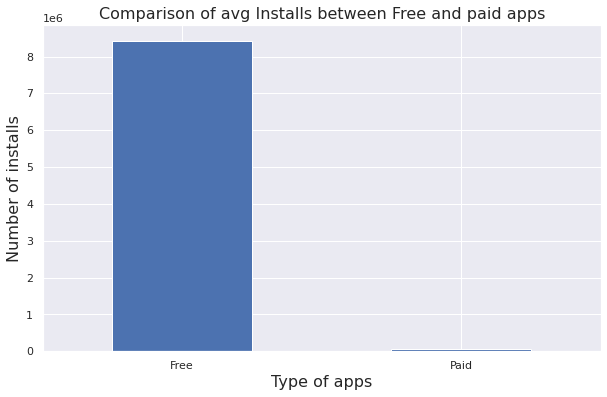

In [ ]:
#Plotting a bar graph to show the comparison between the avg number of installs for free apps and paid apps

apps_pricing_df['Installs'].plot.bar(rot=0)
plt.title('Comparison of avg Installs between Free and paid apps', fontsize = 16)
plt.ylabel('Number of installs', fontsize = 16)
plt.xlabel('Type of apps', fontsize = 16)

Text(0.5, 0, 'Type of apps')

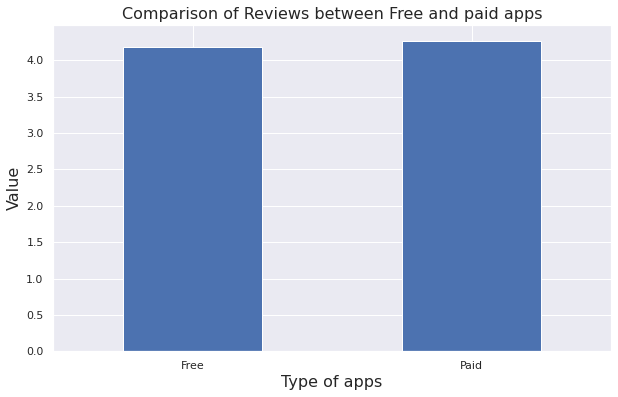

In [ ]:
#Plotting a bar graph to show the comparions between the avg rating that a paid app receives vs the same for free apps

plt.rcParams['figure.figsize'] = 10,6
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
apps_pricing_df['Rating'].plot.bar(rot=0)
plt.title('Comparison of Reviews between Free and paid apps' , fontsize = 16)
plt.ylabel('Value' , fontsize = 16)
plt.xlabel('Type of apps' , fontsize = 16)

By looking at both the bar plots above we can see that there is a huge gap in avg number of installs between free and paid apps which says that the audience for paid apps is a lot smaller but the avg rating for paid apps are slightly higher than that of free apps which proves that sometimes a price tag brings a tad bit better quality


In [ ]:
#filtering all the paid apps and then grouping them by their category and performing mean on number of Installs to find the top categories of paid apps

top_paid_category = play_store_df[play_store_df.Type=='Paid'].groupby('Category')['Installs'].mean().reset_index().sort_values(by='Installs',ascending=False)
top_paid_category.head(5)

,Category,Installs
12,GAME,256097.134146
6,EDUCATION,150500.000000
9,FAMILY,112840.513661
29,WEATHER,101500.000000
7,ENTERTAINMENT,100000.000000


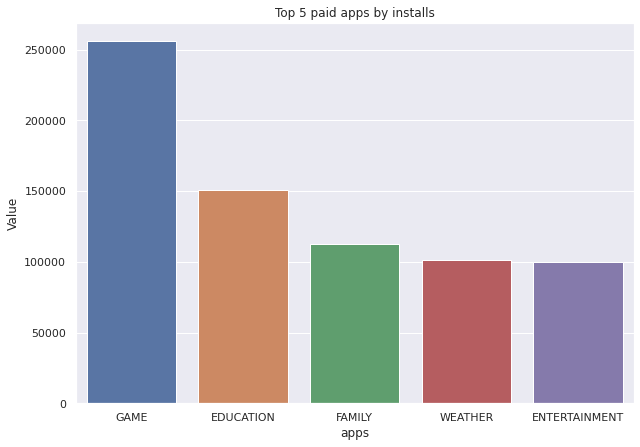

In [ ]:
#plotting a barplot to show the top 5 paid apps categories by avg no. of installs
plt.rcParams['figure.figsize'] = 10,7
ax = sns.barplot(x="Category", y="Installs", data=top_paid_category[:5],ci=0)
plt.title('Top 5 paid apps by installs')
plt.ylabel('Value')
plt.xlabel('apps')

if we take a look at the bar plot above we can notice that paid apps coming under gaming category/genre are most installed followed by education 

In [ ]:
#filtering all the paid apps and then grouping them by their category and perfoming mean on the price to find the most expensive categories in paid apps bracket

top5_expensive= play_store_df[play_store_df.Type=='Paid'].groupby('Category')['Price'].mean().reset_index().sort_values(by='Price',ascending=False)

Text(0.5, 0, 'apps')

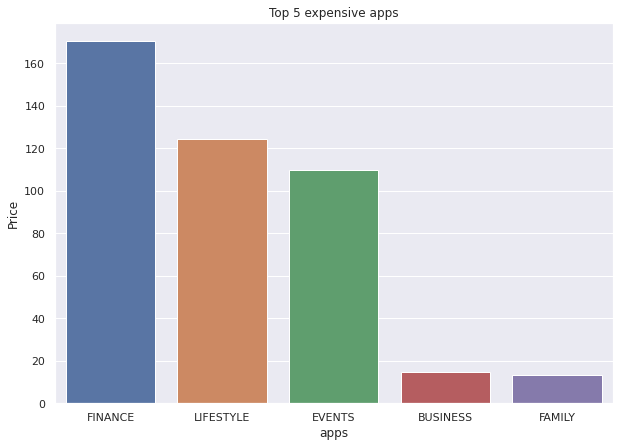

In [ ]:
#plotting a barplot to show the top 5 most expensive categories of paid apps

ax = sns.barplot(x="Category", y="Price", data=top5_expensive[:5],ci=0)
plt.title('Top 5 expensive apps')
plt.ylabel('Price')
plt.xlabel('apps')

The barplot makes it clear that those paid apps that come under finance category are generally more costly

### At last we are gonna look at how much of a role timely updates play in an app's popularity and success

In [ ]:
#Finding the most recent date of which we have record in Last Updated column
most_recently_updated = play_store_df["Last Updated"].max()

In [ ]:
most_recently_updated

Timestamp('2018-08-08 00:00:00')

In [ ]:
#Subtraction one year from the timestamp
time_argument = most_recently_updated - timedelta(days = 365)

In [ ]:
#Creating a new column to indicate whether an app was updated within one year of the most recent timestamp record that we have or more than one year 
play_store_df["Last Updated Within"] = np.where(play_store_df["Last Updated"] >= time_argument , "Less Than One Year" , "More Than One Year")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

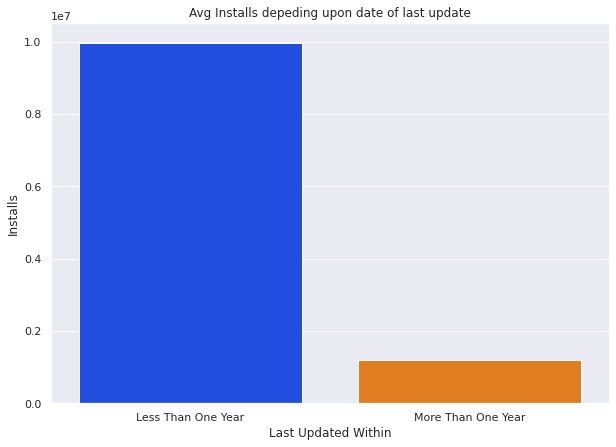

In [ ]:
#Plotting a bar chart to show how much timely updates play a role in app's engagement and success

sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
sns.barplot(y ="Installs" , x="Last Updated Within" , palette = "bright" , data=play_store_df , ci=0)
plt.title("Avg Installs depeding upon date of last update")


Apps that are updated within last year have 10 times more installs than those which are not updated since one year


## In our 2nd data frame we have user reviews of different apps and three more variables named :- sentiment , sentiment polarity and sentiment subjectivity 

*   Sentiment Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive, neagtive or neutral.
*   Sentiment Subjectivity is when text is an explanatory article which must be analysed in context



In [ ]:
#Reading the csv file from our database
file_path2 = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/User Reviews.csv"
app_review_df = pd.read_csv(file_path2)

### First we will perform some basic data exploration such as


*   Checking the head of the database to gain some general idea about the nature of the database 
*   Finding  out its shape to know how many observations and variables are in our dataset
*   We are also using info( ) to check the information about data and datatypes of each respective variable

All of this will help us to know our database better 

In [ ]:
app_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
app_review_df.shape #we have in total 64295 rows and 5 variables

(64295, 5)

In [ ]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
app_review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Basic Data Cleaning to handle out the arbitary, duplicates as well as null/na values

In [ ]:
#Dropping rows that have null values in Translated_Review column

app_review_df.dropna(subset=["Translated_Review"], inplace=True)

In [ ]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


### Now we will try to find out the apps having most number of Reviews and the general user sentiment across these apps

In [ ]:
#Adding additonal count column to the dataset to reflect the total number of reviews the app in observation has
app_review_df["review_count"] = app_review_df.groupby('App')['App'].transform('count')
most_reviews_apps = app_review_df.sort_values(by="review_count" , ascending=False , ignore_index=True)
most_reviews_apps

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,review_count
0,Bowmasters,"Should vary videos required watch, least give ...",Positive,0.042857,0.394286,312
1,Bowmasters,Just Awesome bloody fun! Think Mortal Kombat b...,Positive,0.386111,0.822222,312
2,Bowmasters,Ui needs work. Hero select frustrating. Too ma...,Positive,0.050000,0.700000,312
3,Bowmasters,"It uses Target advertising let hit "" thank you...",Neutral,0.000000,0.000000,312
4,Bowmasters,I rate 4 stars ads chests really annoying I'm ...,Negative,-0.182727,0.570909,312
...,...,...,...,...,...,...
37422,Bed Time Fan - White Noise Sleep Sounds,"If app, I'd lug fan everywhere, love it!!",Positive,0.781250,0.600000,1
37423,CBS News,I hoping find feature yesterday news find it.,Neutral,0.000000,0.000000,1
37424,Calculator - unit converter,Its great calculator India India different num...,Positive,0.183333,0.533333,1
37425,DashClock Widget,"Most still functional, Gmail integration appea...",Positive,0.033333,0.419048,1


In [ ]:
most_reviewed_groupby =  most_reviews_apps.groupby('App')['App'].count().sort_values(ascending=False)
most_reviewed_groupby

App
Bowmasters                        312
Angry Birds Classic               273
Helix Jump                        273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
HD Camera                           1
Discover Mobile                     1
Draw A Stickman                     1
Draw In                             1
Fruit Block - Puzzle Legend         1
Name: App, Length: 865, dtype: int64

Text(0.5, 1.0, 'No. of Reviews for top 5 most reviewed apps')

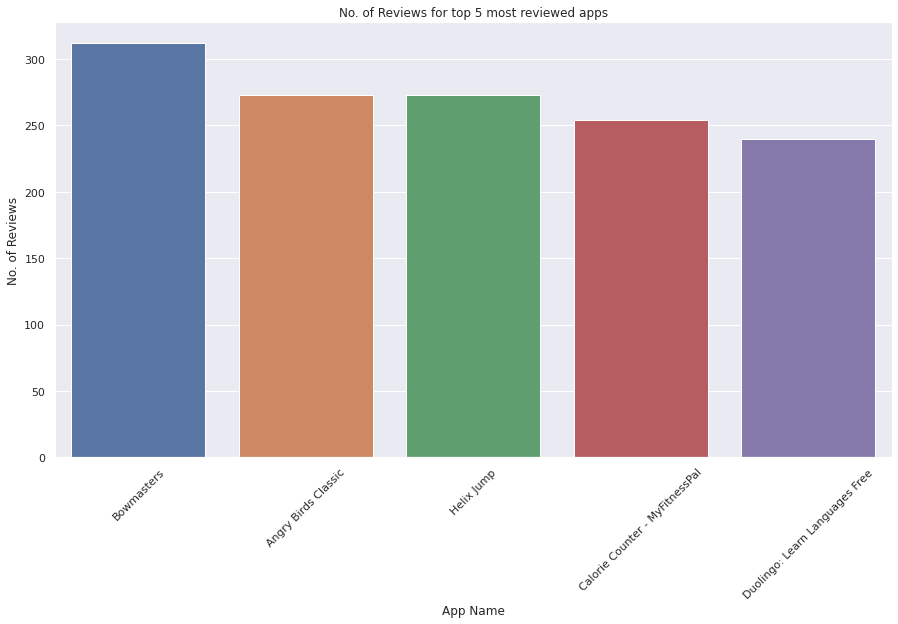

In [ ]:
#plotting a barplot to show comparison amongst top 5 apps in terms of number of reviews

plt.rcParams['figure.figsize'] = 15,8
sns.barplot(y=most_reviewed_groupby.values[:5] , x=most_reviewed_groupby.index.tolist()[:5])
plt.xticks(rotation=45)
plt.xlabel("App Name")
plt.ylabel("No. of Reviews")
plt.title("No. of Reviews for top 5 most reviewed apps")

In [ ]:
#Grouping apps by App name and Sentiment and then slicing the top 5 apps by overall review count
top5_apps_groupby = most_reviews_apps.groupby(["App" , "Sentiment"] ,sort=False).agg({"Translated_Review" : "count"}).reset_index()[:15]

#Making a pivot table with all the sentiments as individual Columns to show the number of positive , negative and neutral reviews the top 5 apps have received
top5_apps_groupby_pivot = top5_apps_groupby.pivot(index="App" , columns="Sentiment" , values="Translated_Review")
top5_apps_groupby_pivot

Sentiment,Negative,Neutral,Positive
App,,,
Angry Birds Classic,147,2,124
Bowmasters,119,24,169
Calorie Counter - MyFitnessPal,52,33,169
Candy Crush Saga,126,12,102
Helix Jump,58,6,209


As we can see in our results above Bowmasters is the most reviewed app 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

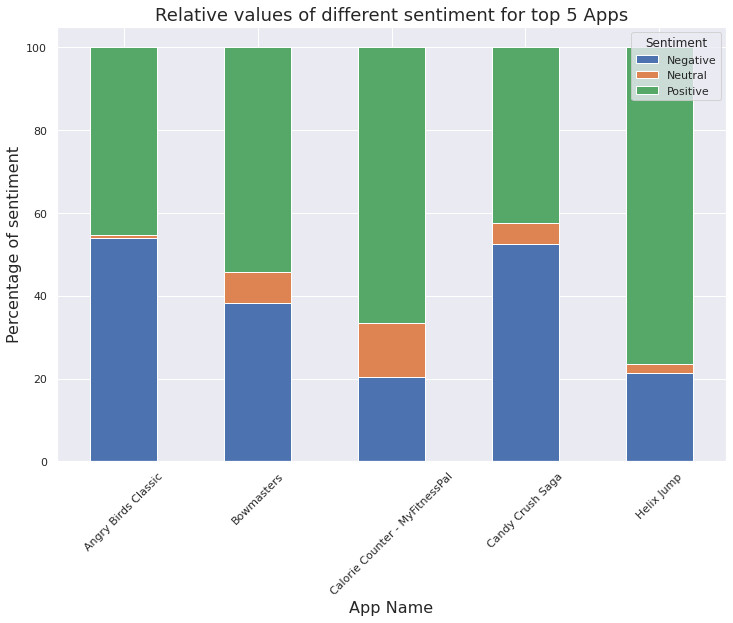

In [ ]:
#Changing the int values of sentiment to percent
top5_apps_groupby_pivot = top5_apps_groupby_pivot.apply(lambda x: x*100/sum(x) , axis=1)

#Plotting a bar chart to show the relative values of positive, negative and neutral reviews the top 5 most reviewed apps have received
top5_apps_groupby_pivot.plot(kind="bar" ,stacked=True , figsize=(12,8))
plt.xlabel("App Name" , fontsize = 16)
plt.ylabel("Percentage of sentiment" , fontsize =16)
plt.title("Relative values of different sentiment for top 5 Apps" , fontsize =18)
plt.xticks(rotation=45)


In [ ]:
#Finding out the most reviewed app 
most_reviewed_app = most_reviews_apps[most_reviews_apps["review_count"] == most_reviews_apps["review_count"].max()]


Text(0.5, 1.0, 'Wordcloud of Bowmasters reviews')

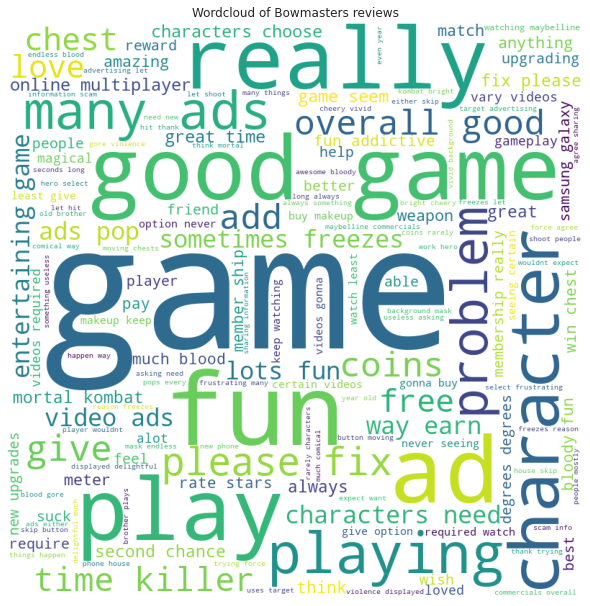

In [ ]:
#Importing wordcloud 
from wordcloud import WordCloud, STOPWORDS

#Making a wordcloud of all the reviews of Bowmasters to find something meaningful and important points from all the reviews

review_words= ""
stopwords = set(STOPWORDS)

for index,row in most_reviewed_app.iterrows():
  review_words += row["Translated_Review"]

review_words = review_words.lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud of Bowmasters reviews")

### We will now try to explore the sentiment polarity to find most positively polarised app in our whole dataset

In [ ]:
#Grouping apps by App name and perfoming addition on sentiment polarity to find the net sentiment value of all the apps
sentiment_df = most_reviews_apps.groupby('App').agg({'Sentiment_Polarity':'sum'}).sort_values(by='Sentiment_Polarity',ascending=False).reset_index()
sentiment_df.rename(columns = {'Sentiment_Polarity' : 'Total_Sentiment'},inplace=True)
sentiment_df

,App,Total_Sentiment
0,10 Best Foods for You,91.322167
1,Calorie Counter - MyFitnessPal,54.996746
2,Calorie Counter - MyNetDiary,52.242037
3,Calorie Counter - Macros,49.503736
4,Duolingo: Learn Languages Free,48.097857
...,...,...
860,Anthem Anywhere,-5.718525
861,Candy Crush Jelly Saga,-6.740408
862,Agar.io,-8.241904
863,Candy Crush Soda Saga,-9.475175


Text(0.5, 0, 'App Name')

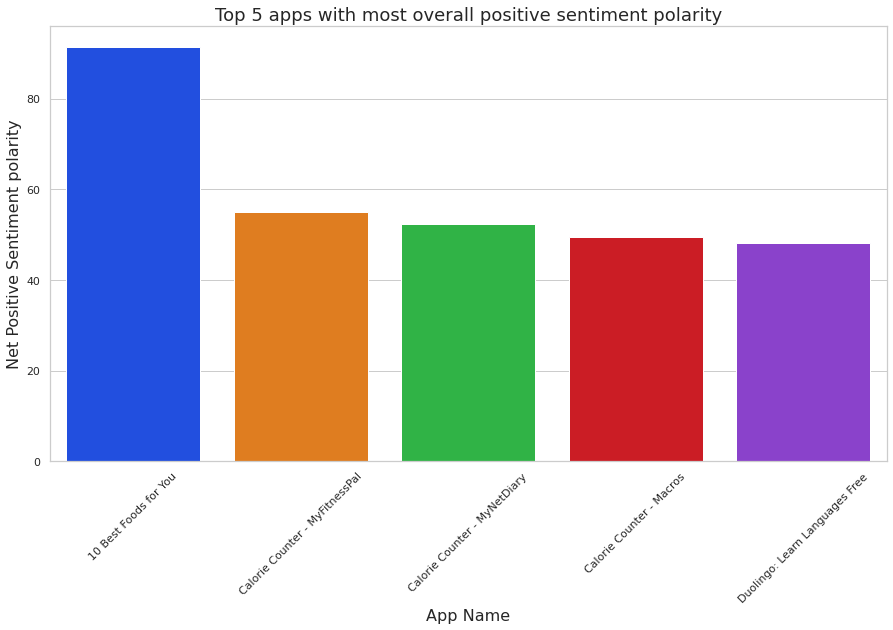

In [ ]:

#plotting a bar plot to show the comparison between the net sentiment value of the top 5 apps
sns.set_theme(style="whitegrid")
sns.barplot(x="App", y="Total_Sentiment",palette='bright', data=sentiment_df[:5])
plt.title('Top 5 apps with most overall positive sentiment polarity' , fontsize = 18 )
plt.xticks(rotation=45)
plt.ylabel("Net Positive Sentiment polarity" , fontsize = 16)
plt.xlabel("App Name" , fontsize = 16)


10 Best Foods for You is at the first place which shows that majority of its reviews have a positive sound to it 

## Merging the two dataset and find correlations if any between two 

In [ ]:
def convert_bytes(i):
  
  ''' Converting megabytes and kilobytes to bytes '''

  if i.count('M')==1:
    return float(i[:-1])*1024*1024
  elif i.count('K')==1:
    return float(i[:-1])*1024
  else:
    return 0

In [ ]:
#Changing the size of the apps from string to an int 
play_store_df['Size']= play_store_df.Size.apply(convert_bytes)

In [ ]:
#Grouping by app name and performing sum on sentiment and mean on subjectivity
app_review_grouped_df = app_review_df.groupby('App').agg({'Sentiment_Polarity':'sum','Sentiment_Subjectivity':'mean'})

In [ ]:
#Merging the two dataframes by their App name
merged_df = pd.merge(play_store_df, app_review_grouped_df, how='inner',left_on='App',right_on='App')

#Renaming columns of merged dataframe
merged_df.rename(columns = {'Sentiment_Polarity':'Total_sentiment','Sentiment_Subjectivity':'mean_sentiment_subjectivity'}, inplace = True)

In [ ]:
#Checking the head of merged dataframe
merged_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total_sentiment,mean_sentiment_subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,6.716667,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,34603008.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,24.163460,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,40894464.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,1.650595,0.679226


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

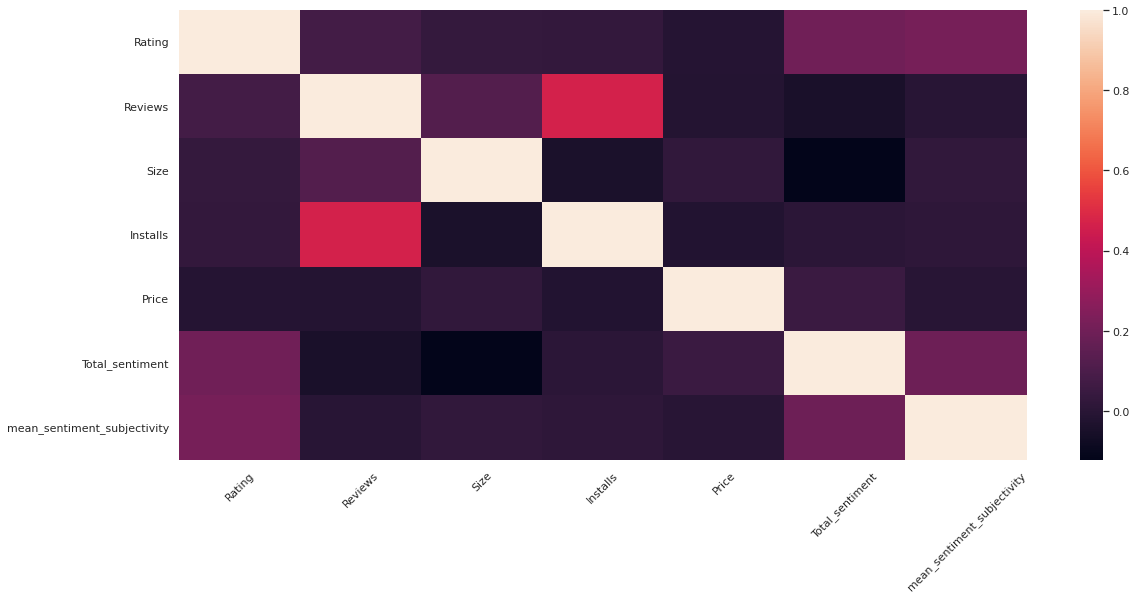

In [ ]:
#Finding a heatmap between all the variables of the merged dataframe

sns.set(rc={'figure.figsize':(19,8.27)})
sns.heatmap(merged_df.corr())
plt.xticks(rotation = 45)


In [ ]:
merged_df.describe()

,Rating,Reviews,Size,Installs,Price,Total_sentiment,mean_sentiment_subjectivity
count,816.000000,8.160000e+02,8.160000e+02,8.160000e+02,816.000000,816.000000,816.000000
mean,4.282598,7.113919e+05,1.857727e+07,2.670946e+07,0.099767,7.965328,0.491992
std,0.313643,3.640515e+06,2.445867e+07,1.099350e+08,1.278179,8.764741,0.085183
min,2.600000,1.140000e+02,0.000000e+00,1.000000e+03,0.000000,-9.726559,0.000000
25%,4.100000,7.777750e+03,0.000000e+00,1.000000e+06,0.000000,2.009767,0.452758
50%,4.300000,4.065050e+04,8.808038e+06,3.000000e+06,0.000000,6.478120,0.497103
75%,4.500000,1.983450e+05,2.621440e+07,1.000000e+07,0.000000,11.262122,0.537958
max,4.900000,7.815831e+07,1.038090e+08,1.000000e+09,29.990000,91.322167,0.916667


In [ ]:
# filtering the observations by mean values of Installs, Reviews , Total_sentiment and Rating  .
mean_df= merged_df[(merged_df.Installs > 2.670946e+07	) & (merged_df.Reviews>	7.113919e+05 ) & (merged_df.Total_sentiment>7.965328) &(merged_df.Rating>4.282598)]

#Sorting the resultant dataframe
mean_df.sort_values(by=['Installs','Reviews','Rating','Total_sentiment'],ascending=[False,False,False,False] , ignore_index=True)[0:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Within,Total_sentiment,mean_sentiment_subjectivity
0,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Less Than One Year,28.174331,0.501894
1,Google,TOOLS,4.4,8033493,0.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,Less Than One Year,9.893660,0.492744
2,Dropbox,PRODUCTIVITY,4.4,1861310,63963136.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,Less Than One Year,17.961120,0.443636
3,Clash Royale,GAME,4.6,23133508,101711872.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up,Less Than One Year,11.410923,0.489236
4,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,0.0,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device,Less Than One Year,48.097857,0.470215
5,Flipkart Online Shopping App,SHOPPING,4.4,6012719,0.0,100000000,Free,0.0,Teen,Shopping,2018-08-06,Varies with device,Varies with device,Less Than One Year,8.162738,0.478862
6,"APUS Launcher - Theme, Wallpaper, Hide Apps",PERSONALIZATION,4.5,5783441,14680064.0,100000000,Free,0.0,Everyone,Personalization,2018-08-06,3.9.7,4.0.3 and up,Less Than One Year,13.871667,0.518548
7,Garena Free Fire,GAME,4.5,5465624,55574528.0,100000000,Free,0.0,Teen,Action,2018-08-03,1.21.0,4.0.3 and up,Less Than One Year,15.797047,0.494133
8,Crossy Road,GAME,4.5,4230886,62914560.0,100000000,Free,0.0,Everyone,Action,2018-08-01,3.1.0,5.0 and up,Less Than One Year,19.642467,0.529847
9,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,0.0,100000000,Free,0.0,Mature 17+,Social,2018-08-02,Varies with device,Varies with device,Less Than One Year,15.418701,0.416103


Above is a list of 10 most successful apps with above mean values for all the varibles 

## Conclusion 

So with this we are done with our EDA on both the play store and user reviews dataset . Throughout this process we carefully handled all the null values , removed all the duplicate and made sure that the resultant data on which we are gonna perform our eda will give us non arbitary results. We used data visualization libraries to better understand the relation between different categorical columns that we had in both of our dataset 

We realised how much of an important role an app's category, content rating, timely updates and pricing plays in its overall success and engagement i.e how much it effects its number of installs and rating .In the second database we analysed the user sentiment of some of the top apps from the reviews given to them by the users and then we merged the two datasets to find the tops apps overall 